In [4]:
#Libraries & Packages Import.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import folium

In [5]:
#Loading webscraped data for analysis.

#pd.options.display.max_columns = 100
file = pd.read_excel('Zillow_visualization_final.xlsx')
data = pd.DataFrame(file,columns=['streetAddress', 'city', 'county', 'state', 'zipcode',
                                  'price', 'yearBuilt', 'homeType', 'bedrooms', 'bathrooms',
                                  'livingAreaValue', 
                                  'lotAreaValue', 'resoFacts_pricePerSquareFoot', 'propertyTaxRate', 
                                  'resoFacts_furnished', 'resoFacts_parking', 'resoFacts_hasGarage', 'resoFacts_hasPetsAllowed',
                                  'zestimate', 'rentZestimate', 'lastSoldPrice', 'daysOnZillow',
                                  'longitude', 'latitude'])                                  

data.head()

streetAddress           city                county state  zipcode  \
0     1 Kelton Ct APT 2B        Oakland        Alameda County    CA    94611   
1       1000 3rd St #505  San Francisco  San Francisco County    CA    94158   
2  1001 Pine St UNIT 601  San Francisco  San Francisco County    CA    94109   
3        1002 Furlong Dr       San Jose    Santa Clara County    CA    95123   
4     1002 Peppertree Pl      Livermore        Alameda County    CA    94550   

     price  yearBuilt       homeType  bedrooms  bathrooms  ...  \
0   750000       1974          CONDO         1          1  ...   
1  1638000       2018          CONDO         2          2  ...   
2   748000       1963          CONDO         1          1  ...   
3  1249000       1997  SINGLE_FAMILY         4          3  ...   
4  1550000       2004  SINGLE_FAMILY         5          4  ...   

   resoFacts_furnished  resoFacts_parking  resoFacts_hasGarage  \
0                    0                  1                    1   
1                    0                  1                    1   
2                    0                  1                    1   
3                    0                  0                    0   
4                    0                  2                    1   

   resoFacts_hasPetsAllowed  zestimate  rentZestimate  lastSoldPrice  \
0                         0   555700.0           2336         425000   
1                         1  1630300.0           4949        1535000   
2                         0   759300.0           2762         500000   
3                         0  1327718.0           4383         510000   
4                         0  1800400.0           5499         849000   

   daysOnZillow   longitude   latitude  
0             8 -122.250824  37.824261  
1             1 -122.389893  37.773434  
2             1 -122.412666  37.790520  
3             8 -121.866714  37.245018  
4            15 -121.768440  37.673233  

[5 rows x 24 columns]

In [6]:
#Chart-1.1: Scatterplot analysing the Variation of Property Price with Bedrooms.

priceList = list(data['price'])
bedList = list(data['bedrooms'])
bathList = list(data['bathrooms'])
hover_df = pd.DataFrame(data, 
                        columns = {'city', 'county', 'yearBuilt', 'bathrooms', 'livingAreaValue', 'lotAreaValue', 
                        'resoFacts_pricePerSquareFoot', 'propertyTaxRate', 'zestimate'})


fig = go.Figure()
fig = px.scatter(data,x=bedList,y=priceList,color=data['homeType'],size=priceList,hover_data=hover_df)
fig.update_layout(
    title="Price Variation w/ Bedrooms",
    xaxis_title="No. of Bedrooms",
    yaxis_title="Price of Property (in Million USD)",
    legend_title="HomeType",
    font=dict(
        family="Arial, monospace",
        size=15,
        color="RebeccaPurple"
    )
)
fig.show()


In [7]:
#Chart-1.2: Scatterplot analysing the Variation of Property Price with Bathrooms.

priceList = list(data['price'])
bedList = list(data['bedrooms'])
bathList = list(data['bathrooms'])
hover_df = pd.DataFrame(data, 
                        columns = {'city', 'county', 'yearBuilt', 'bathrooms', 'livingAreaValue', 'lotAreaValue', 
                        'resoFacts_pricePerSquareFoot', 'propertyTaxRate', 'zestimate'})


fig = go.Figure()
fig = px.scatter(data,x=bathList,y=priceList,color=data['homeType'],size=priceList,hover_data=hover_df)
fig.update_layout(
    title="Price Variation w/ Bathrooms",
    xaxis_title="No. of Bathrooms",
    yaxis_title="Price of Property (in Million USD)",
    legend_title="HomeType",
    font=dict(
        family="Arial, monospace",
        size=15,
        color="RebeccaPurple"
    )
)
fig.show()

<Figure size 432x288 with 0 Axes>

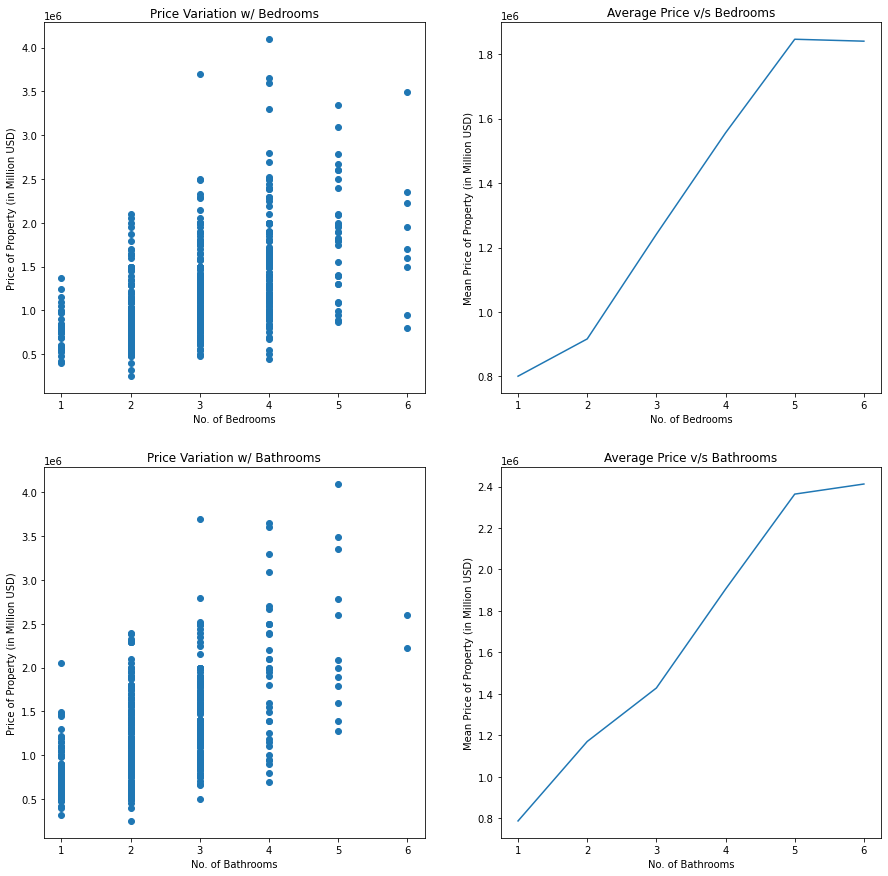

In [8]:
#Chart-1.3: Subplots analysing the Variation of Property Price with Bedrooms,Bathrooms.

priceList = list(data['price'])
bedList = list(data['bedrooms'])
bathList = list(data['bathrooms'])

meanPriceList_bed = list(data.groupby('bedrooms')['price'].mean())
meanPriceList_bath = list(data.groupby('bathrooms')['price'].mean())

fig=plt.figure()
fig,((ax1, ax2), (ax3, ax4))=plt.subplots(2,2,figsize=(15,15))

ax1.scatter(bedList,priceList)
ax1.set_title('Price Variation w/ Bedrooms')
ax1.set_xlabel('No. of Bedrooms')
ax1.set_ylabel('Price of Property (in Million USD)')

ax2.plot(np.unique(bedList),meanPriceList_bed)
ax2.set_title('Average Price v/s Bedrooms')
ax2.set_xlabel('No. of Bedrooms')
ax2.set_ylabel('Mean Price of Property (in Million USD)')

ax3.scatter(bathList,priceList)
ax3.set_title('Price Variation w/ Bathrooms')
ax3.set_xlabel('No. of Bathrooms')
ax3.set_ylabel('Price of Property (in Million USD)')

ax4.plot(np.unique(bathList),meanPriceList_bath)
ax4.set_title('Average Price v/s Bathrooms')
ax4.set_xlabel('No. of Bathrooms')
ax4.set_ylabel('Mean Price of Property (in Million USD)')

plt.show()


<Figure size 432x288 with 0 Axes>

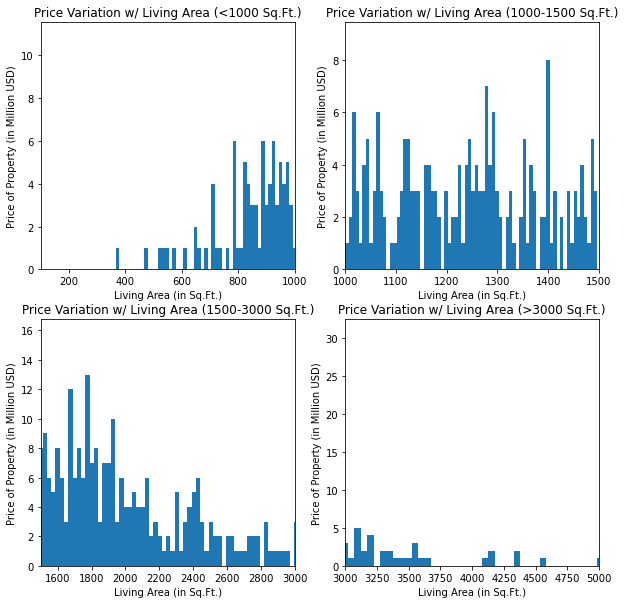

In [9]:
#Chart-2: Subplots analysing the Variation of Property Price with Living Area.

A1 = data[data['livingAreaValue']<=1000]
A2 = data[(data['livingAreaValue']>1000) & (data['livingAreaValue']<=1500)]
A3 = data[(data['livingAreaValue']>1500) & (data['livingAreaValue']<=3000)]
A4 = data[data['livingAreaValue']>3000]

fig=plt.figure()
fig,((ax1, ax2), (ax3, ax4))=plt.subplots(2,2,figsize=(10,10))

ax1.set_xlim([100,1000])
ax1.hist(data.livingAreaValue,bins=400)
#ax1.bar(A1['livingAreaValue'],A1['price'], width=15)
ax1.set_title('Price Variation w/ Living Area (<1000 Sq.Ft.)')
ax1.set_xlabel('Living Area (in Sq.Ft.)')
ax1.set_ylabel('Price of Property (in Million USD)')

ax2.set_xlim([1000,1500])
ax2.hist(data.livingAreaValue,bins=750)
#ax2.bar(A2['livingAreaValue'],A2['price'], width=1.5)
ax2.set_title('Price Variation w/ Living Area (1000-1500 Sq.Ft.)')
ax2.set_xlabel('Living Area (in Sq.Ft.)')
ax2.set_ylabel('Price of Property (in Million USD)')

ax3.set_xlim([1500,3000])
ax3.hist(data.livingAreaValue,bins=200)
#ax3.bar(A3['livingAreaValue'],A3['price'], width=1.5)
ax3.set_title('Price Variation w/ Living Area (1500-3000 Sq.Ft.)')
ax3.set_xlabel('Living Area (in Sq.Ft.)')
ax3.set_ylabel('Price of Property (in Million USD)')

ax4.set_xlim([3000,5000])
ax4.hist(data.livingAreaValue,bins=100)
#ax4.bar(A4['livingAreaValue'],A4['price'], width=15)
ax4.set_title('Price Variation w/ Living Area (>3000 Sq.Ft.)')
ax4.set_xlabel('Living Area (in Sq.Ft.)')
ax4.set_ylabel('Price of Property (in Million USD)')

#plt.hist(data.livingAreaValue,bins=100)
plt.show()

<Figure size 432x288 with 0 Axes>

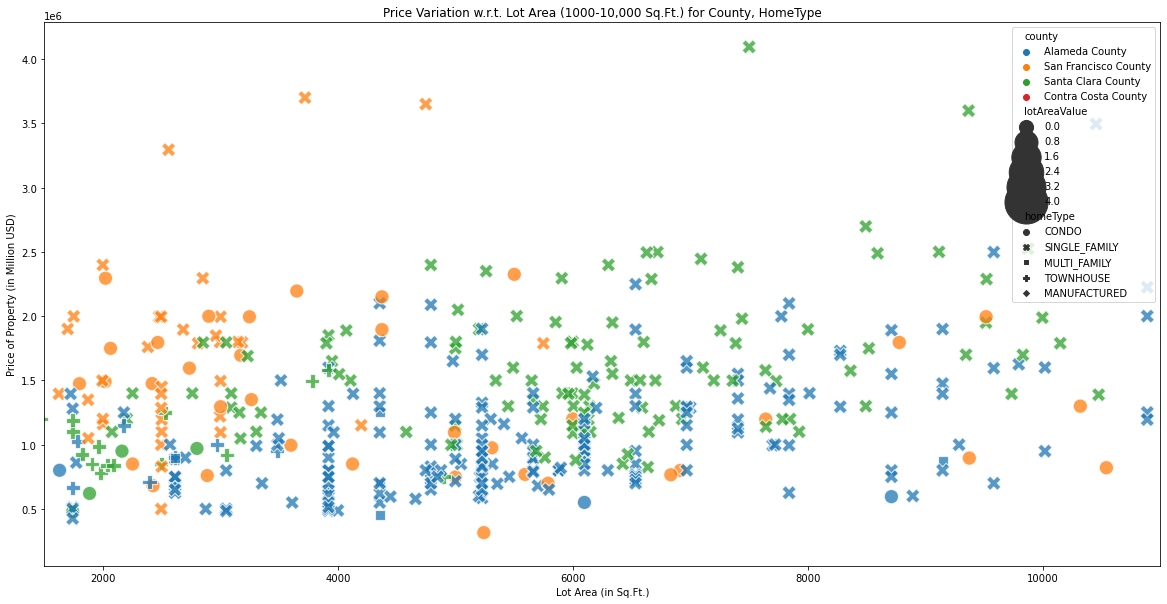

In [10]:
#Chart-3: Scatterplot analysing the Variation of Property Price with Lot Area [Markers Used: County, HomeType].

fig=plt.figure()
fig,ax = plt.subplots(1,1,figsize=(20,10))

sns.scatterplot(data=data, x="lotAreaValue", y="price", size="lotAreaValue", hue="county", style="homeType", 
                alpha=0.75, legend="auto", sizes=(200,2000), color="purple")

#plt.xlim([0,13000])
ax.set_xlim([1500,11000])
ax.set_title('Price Variation w.r.t. Lot Area (1000-10,000 Sq.Ft.) for County, HomeType')
ax.set_xlabel('Lot Area (in Sq.Ft.)')
ax.set_ylabel('Price of Property (in Million USD)')

plt.show()

In [11]:
#Chart-4.1: Comparing the variation in Price/Sq.Ft. w.r.t Location.

fig = px.bar_polar(data, 
                   r = "resoFacts_pricePerSquareFoot", 
                   theta = "city",
                   color = "resoFacts_pricePerSquareFoot",
                   #color_discrete_sequence = px.colors.sequential.Plasma_r,
                   animation_frame = "city",
                   #template="plotly_dark",
                   title = "Price Per SquareFoot Variation w.r.t. Location")

fig.show()

In [12]:
#Chart-4.2: Comparing the variation in Property Tax w.r.t Location.

fig = px.bar_polar(data, 
                   r = "propertyTaxRate", 
                   theta = "city",
                   color = "propertyTaxRate",
                   color_discrete_sequence = px.colors.sequential.Plasma_r,
                   animation_frame = "city",
                   #template="plotly_dark",
                   title = "Property Tax Variation w.r.t. Location")

fig.show()

Text(0.5, 1.0, 'Correlation of Features with Property Price')

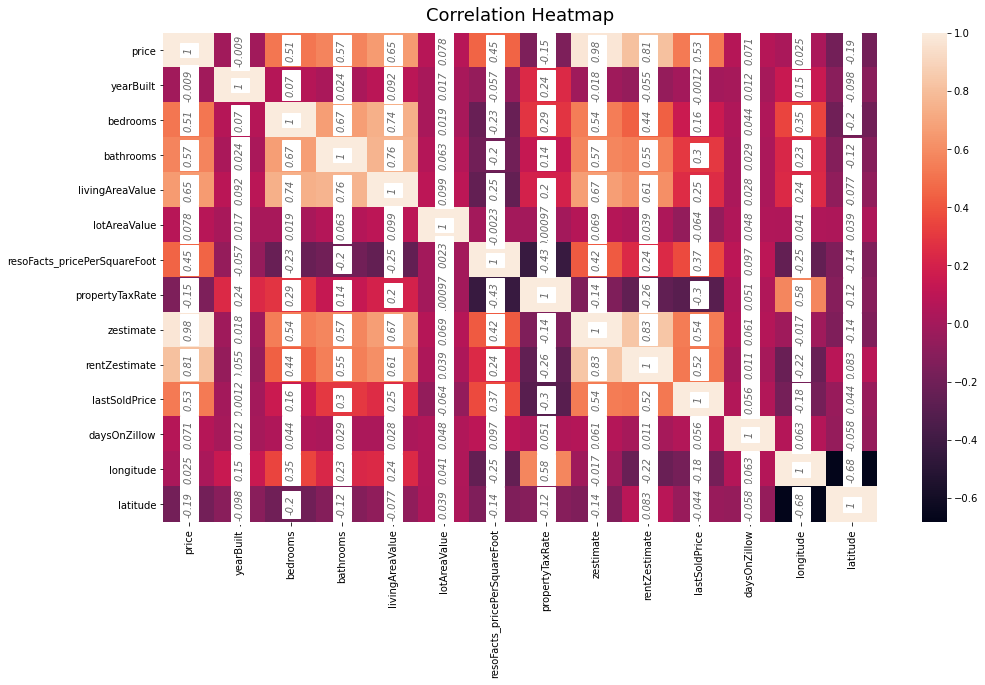

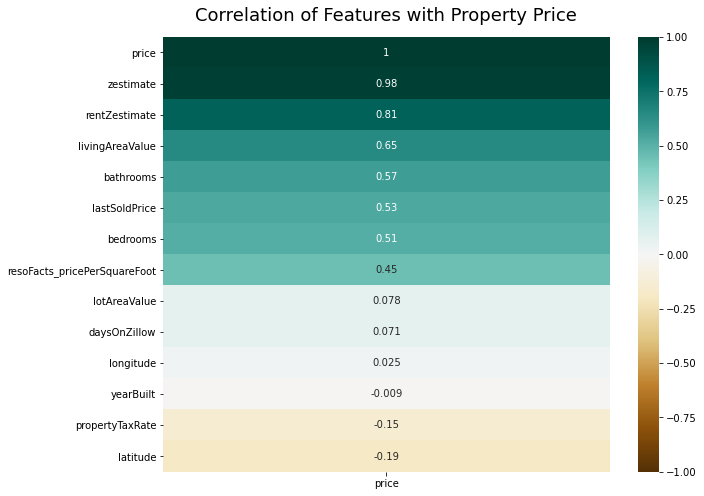

In [13]:
#Chart-5: Correlation Heatmap comparing Correlation of Features with Property Price.

df_intData = data.drop(labels=['streetAddress', 'city', 'county', 'state', 'zipcode','homeType', 'resoFacts_furnished', 'resoFacts_parking', 'resoFacts_hasGarage', 'resoFacts_hasPetsAllowed'], axis=1)

plt.figure(figsize=(16,9))
hmap = sns.heatmap(df_intData.corr(), annot=True, 
            annot_kws={'fontsize':10, 
                       'fontstyle':'italic',  
                       'color':"k",
                       'alpha':0.6, 
                       'rotation':"vertical",
                       'verticalalignment':'center',
                       'backgroundcolor':'w'})
hmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df_intData.corr()[['price']].sort_values(by='price', ascending=False), 
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation of Features with Property Price', fontdict={'fontsize':18}, pad=16)


In [14]:
#Chart-6: Bay Area Geo-Location wise Price Variation

myMap = folium.Map(location=[37.5455,-122.252671], 
                   width=4000,height=4000, 
                   tiles="OpenStreetMap", zoom_start=10)

data = data[['city','latitude','longitude','price']].groupby(by = ['city']).mean().reset_index()

for i in range(0,len(data)):
    folium.Circle(
      location=[data.iloc[i]['latitude'], data.iloc[i]['longitude']],
      popup=data.iloc[i]['city'],
      radius=float(data.iloc[i]['price'])/1000,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(myMap)

myMap